In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Import dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
dataset.shape

(690, 16)

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Training SOM

In [6]:
from minisom import MiniSom

In [7]:
som = MiniSom(x = 10, y = 10, input_len=15, learning_rate=0.5, sigma = 1.0)

In [8]:
som.random_weights_init(X)

In [9]:
som.train_random(X, num_iteration=100)

# Visualizing Results

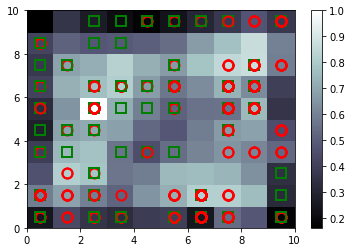

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

# FInding the Frauds

In [11]:
mappings = som.win_map(X)

In [12]:
mappings

defaultdict(list,
            {(0,
              0): [array([0.80274618, 0.        , 0.16165414, 0.01785714, 0.5       ,
                     0.76923077, 0.875     , 0.05263158, 1.        , 0.        ,
                     0.        , 0.        , 0.5       , 0.14      , 0.00824   ]), array([0.97284657, 0.        , 0.48496241, 0.14285714, 0.5       ,
                     0.30769231, 0.25      , 0.        , 1.        , 0.        ,
                     0.        , 0.        , 0.5       , 0.05      , 0.0096    ]), array([0.47654858, 0.        , 0.20932331, 0.05357143, 0.5       ,
                     0.46153846, 0.375     , 0.07017544, 1.        , 0.        ,
                     0.        , 0.        , 0.        , 0.184     , 0.        ]), array([0.82735685, 0.        , 0.21548872, 0.53571429, 0.        ,
                     0.69230769, 1.        , 0.        , 1.        , 0.        ,
                     0.        , 0.        , 0.5       , 0.        , 0.13212   ]), array([0.6764733 , 0. 

In [13]:
mappings.keys()

dict_keys([(5, 9), (6, 9), (3, 1), (9, 1), (7, 3), (5, 6), (2, 8), (7, 7), (2, 1), (8, 9), (2, 6), (9, 4), (5, 1), (0, 3), (8, 5), (2, 5), (1, 2), (3, 8), (9, 0), (4, 9), (5, 5), (2, 9), (0, 6), (7, 6), (3, 0), (5, 0), (2, 2), (1, 3), (8, 6), (5, 3), (1, 1), (9, 7), (0, 0), (3, 6), (7, 1), (4, 5), (7, 9), (9, 3), (6, 0), (1, 4), (7, 5), (0, 5), (0, 7), (8, 7), (0, 4), (1, 0), (0, 8), (3, 3), (0, 1), (8, 3), (7, 0), (4, 6), (9, 2), (6, 1), (5, 7), (9, 9), (7, 4), (2, 0), (3, 5), (3, 9), (4, 3), (1, 7), (2, 4)])

In [14]:
mappings[(3,5)]

[array([0.46839574, 0.        , 0.26315789, 0.13392857, 0.5       ,
        0.92307692, 0.875     , 0.02192982, 1.        , 1.        ,
        0.13432836, 1.        , 0.5       , 0.0905    , 0.        ]),
 array([0.56816789, 0.        , 0.13654135, 0.08178571, 0.5       ,
        0.76923077, 0.875     , 0.08035088, 1.        , 1.        ,
        0.10447761, 1.        , 0.5       , 0.07      , 0.02384   ]),
 array([0.62071686, 0.        , 0.14541353, 0.02821429, 0.        ,
        0.76923077, 0.375     , 0.05263158, 1.        , 1.        ,
        0.02985075, 1.        , 0.5       , 0.04      , 0.004     ]),
 array([0.13174281, 0.        , 0.13909774, 0.41964286, 0.5       ,
        1.        , 0.875     , 0.01754386, 1.        , 1.        ,
        0.02985075, 1.        , 0.5       , 0.15      , 0.00551   ]),
 array([5.87713081e-01, 0.00000000e+00, 4.95037594e-01, 1.64285714e-02,
        5.00000000e-01, 9.23076923e-01, 8.75000000e-01, 1.45614035e-02,
        1.00000000e+00, 1.000000

In [15]:
frauds = mappings[(3,5)]

In [16]:
frauds

[array([0.46839574, 0.        , 0.26315789, 0.13392857, 0.5       ,
        0.92307692, 0.875     , 0.02192982, 1.        , 1.        ,
        0.13432836, 1.        , 0.5       , 0.0905    , 0.        ]),
 array([0.56816789, 0.        , 0.13654135, 0.08178571, 0.5       ,
        0.76923077, 0.875     , 0.08035088, 1.        , 1.        ,
        0.10447761, 1.        , 0.5       , 0.07      , 0.02384   ]),
 array([0.62071686, 0.        , 0.14541353, 0.02821429, 0.        ,
        0.76923077, 0.375     , 0.05263158, 1.        , 1.        ,
        0.02985075, 1.        , 0.5       , 0.04      , 0.004     ]),
 array([0.13174281, 0.        , 0.13909774, 0.41964286, 0.5       ,
        1.        , 0.875     , 0.01754386, 1.        , 1.        ,
        0.02985075, 1.        , 0.5       , 0.15      , 0.00551   ]),
 array([5.87713081e-01, 0.00000000e+00, 4.95037594e-01, 1.64285714e-02,
        5.00000000e-01, 9.23076923e-01, 8.75000000e-01, 1.45614035e-02,
        1.00000000e+00, 1.000000

In [17]:
frauds = sc.inverse_transform(frauds)

In [18]:
frauds = frauds.astype(int)

In [19]:
frauds

array([[15682686,        0,       31,        3,        2,       13,
               8,        0,        1,        1,        9,        1,
               2,      181,        1],
       [15707602,        0,       22,        2,        2,       11,
               8,        2,        1,        1,        7,        1,
               2,      140,     2385],
       [15720725,        0,       23,        0,        1,       11,
               4,        1,        1,        1,        2,        1,
               2,       80,      401],
       [15598614,        0,       23,       11,        2,       14,
               8,        0,        1,        1,        2,        1,
               2,      300,      552],
       [15712483,        0,       46,        0,        2,       13,
               8,        0,        1,        1,       11,        1,
               2,      440,        7],
       [15572361,        0,       41,        2,        1,       11,
               8,        0,        1,        1,       23,